In [ ]:
## Notebook env: mirtud_env (R kernel)
## evaluating proliferation effects of selected TuDs

In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Analysis

In [2]:
## load in data
selected_TuDs_tRFs_proliferation_assay = read.csv('/home/ssobti/projects/mir_tud/wetlab_followup_data/cellcycle/042924_raw_data_plate_2_redo_of_041024_with_6k_cells_seeded.txt', sep='\t', header=T)
tRF_names = c('NC1', 'NC2', 'tRNA-Gly-CCC', 'tRNA-Met-CAT', 'tRNA-Asp-GTC', 'tRNA-Arg-CCT', 'tRNA-Arg-ACG', 'tRNA-Ala-TGC', 'tRNA-Gln-TTG', 'tRNA-Gly-TCC', 'tRNA-Cys-GCA')
colnames(selected_TuDs_tRFs_proliferation_assay) = c('Time Stamp', 'Elapsed hours', unlist(lapply(tRF_names, function(x) paste(x, 1:8, sep = '_'))))
selected_TuDs_tRFs_proliferation_assay = selected_TuDs_tRFs_proliferation_assay[colnames(selected_TuDs_tRFs_proliferation_assay) != 'Time Stamp']
head(selected_TuDs_tRFs_proliferation_assay)

,Elapsed hours,NC1_1,NC1_2,NC1_3,NC1_4,NC1_5,NC1_6,NC1_7,NC1_8,NC2_1,⋯,tRNA-Gly-TCC_7,tRNA-Gly-TCC_8,tRNA-Cys-GCA_1,tRNA-Cys-GCA_2,tRNA-Cys-GCA_3,tRNA-Cys-GCA_4,tRNA-Cys-GCA_5,tRNA-Cys-GCA_6,tRNA-Cys-GCA_7,tRNA-Cys-GCA_8
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,20.71132,21.75511,19.73787,20.50617,22.45657,24.77094,20.91230,19.43110,23.77916,⋯,19.19362,15.80000,13.03755,15.75861,15.67540,15.85026,15.93299,15.50231,14.34369,12.26948
2,6,23.64049,25.27654,23.49869,23.68949,26.15415,28.55073,23.79849,22.77525,27.77372,⋯,21.82221,18.31161,15.21146,18.31369,18.33114,17.88889,18.09966,17.18063,16.50917,13.38922
3,12,27.62563,28.41711,26.00224,27.32057,30.35599,33.34934,28.37560,27.14813,32.90941,⋯,25.16727,21.83426,17.64754,21.22316,21.98372,21.05428,21.77557,20.34835,19.60583,16.01822
4,18,30.96389,32.92411,31.23648,32.48401,35.09495,38.32404,31.98067,31.16760,38.13247,⋯,29.68305,25.34941,19.73663,25.05825,26.10731,24.17921,24.87455,23.35664,22.61309,18.93247
5,24,37.47868,37.52778,36.25420,37.68656,40.28369,44.87124,38.33616,35.61828,42.77271,⋯,34.89872,29.46603,23.03746,28.54960,29.66558,28.31222,28.83141,27.83456,26.18296,22.01547
6,30,42.23746,43.17035,41.57055,42.58533,45.49344,49.86810,44.18456,41.33556,48.37096,⋯,39.53910,33.62185,26.98798,33.20945,34.60340,33.01286,33.00163,30.94781,30.19032,25.00444


In [3]:
## mean by replicate
selected_TuDs_tRFs_proliferation_assay_mean = selected_TuDs_tRFs_proliferation_assay %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('tRF', 'replicate'), names_sep = '_') %>% group_by(`Elapsed hours`, tRF) %>% summarise(mean = mean(value), sd = sd(value))
head(selected_TuDs_tRFs_proliferation_assay_mean)

`summarise()` has grouped output by 'Elapsed hours'. You can override using the
`.groups` argument.


Elapsed hours,tRF,mean,sd
<int>,<chr>,<dbl>,<dbl>
0,NC1,21.28517,1.717577
0,NC2,26.35205,2.090298
0,tRNA-Ala-TGC,24.40994,1.160907
0,tRNA-Arg-ACG,20.64527,1.537850
0,tRNA-Arg-CCT,14.17886,1.840176
0,tRNA-Asp-GTC,25.39949,2.773607


In [4]:
wider_selected_TuDs_tRFs_proliferation_assay_mean = selected_TuDs_tRFs_proliferation_assay_mean %>% select(-sd) %>% pivot_wider(names_from = 'tRF', values_from = 'mean')
wider_selected_TuDs_tRFs_proliferation_assay_mean = as.data.frame(wider_selected_TuDs_tRFs_proliferation_assay_mean)
head(wider_selected_TuDs_tRFs_proliferation_assay_mean)

,Elapsed hours,NC1,NC2,tRNA-Ala-TGC,tRNA-Arg-ACG,tRNA-Arg-CCT,tRNA-Asp-GTC,tRNA-Cys-GCA,tRNA-Gln-TTG,tRNA-Gly-CCC,tRNA-Gly-TCC,tRNA-Met-CAT
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,21.28517,26.35205,24.40994,20.64527,14.17886,25.39949,14.79629,23.02831,25.74438,18.18256,27.73526
2,6,24.67298,30.62338,27.90068,24.13946,16.09994,29.74574,16.86548,26.62405,29.98887,21.08222,31.87678
3,12,28.57433,35.62441,32.43306,28.34499,19.15034,34.42843,19.95708,31.39810,34.88325,24.68399,37.20865
4,18,33.02197,40.78555,37.20426,32.40196,22.05626,40.03932,23.10727,36.37416,40.29872,28.74325,43.18886
5,24,38.50707,46.61500,42.64222,37.56911,25.46812,45.59830,26.80366,42.08245,46.20709,33.75913,48.82688
6,30,43.80567,52.48362,48.57110,42.98700,29.44136,51.20291,30.86974,47.55611,51.87757,38.57693,54.60810


### Results

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 11. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 65 rows containing missing values (`geom_point()`).”


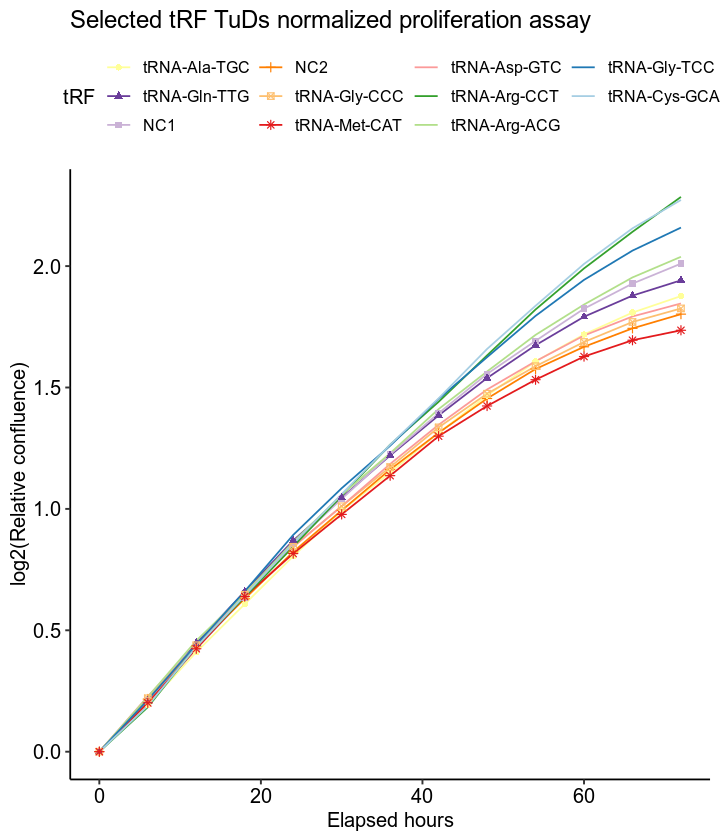

In [5]:
options(repr.plot.width=6, repr.plot.height=7)
## normalized starting point proliferation assay plot
## get log2 version of data
log2_wider_selected_TuDs_tRFs_proliferation_assay_mean = cbind('Elapsed hours' = wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`, wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-`Elapsed hours`) %>% log2())
minimum = log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) %>% min()
diff_from_minimum =  log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% filter(`Elapsed hours` == 0) %>% select(-`Elapsed hours`) - minimum
diff_from_minimum = as.numeric(diff_from_minimum)
## first subract min from all points
zeroed_data = log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-`Elapsed hours`) - minimum

## then subtract difference between min and first points from all points
normalized_log2_data = zeroed_data
for (i in 1:ncol(zeroed_data)){
    normalized_log2_data[,i] = zeroed_data[,i] - diff_from_minimum[i]
}
normalized_log2_data = cbind('Elapsed hours' = wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`, normalized_log2_data)

## plot
normalized_longer_log2_data = normalized_log2_data %>% pivot_longer(cols = -c('Elapsed hours'), names_to = c('tRF'), values_to = 'mean') %>% as.data.frame()
normalized_longer_log2_data$tRF = factor(normalized_longer_log2_data$tRF, levels = c('tRNA-Ala-TGC', 'tRNA-Gln-TTG', 'NC1', 'NC2', 'tRNA-Gly-CCC', 'tRNA-Met-CAT', 'tRNA-Asp-GTC', 'tRNA-Arg-CCT', 'tRNA-Arg-ACG', 'tRNA-Gly-TCC', 'tRNA-Cys-GCA'))
ggplot(normalized_longer_log2_data, aes(x = `Elapsed hours`, y = mean, color = tRF, shape = tRF)) +
geom_line() +
geom_point() +
theme_pubr() + scale_color_brewer(palette = "Paired", direction = -1) + 
labs(title = "Selected tRF TuDs normalized proliferation assay",
      x = "Elapsed hours",
      y = "log2(Relative confluence)")

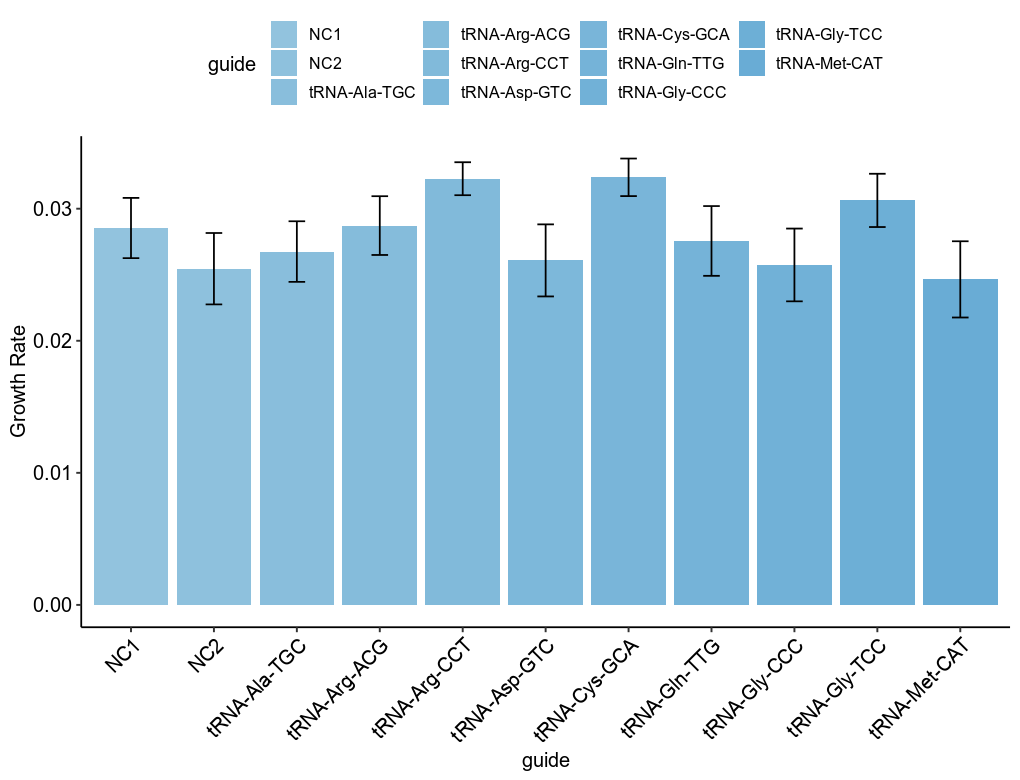

In [6]:
options(repr.plot.width=8.5, repr.plot.height=6.5)
## fitted line slopes logged
slopes = list()
upper_error = list()
lower_error = list()
n = 1
for (i in 1:length(colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean))){
    if (i > 1){
        slopes[[n]] = as.numeric(coef(lm(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean[,i] ~ log2_wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`))[2])
        limits = abs(slopes[[n]] - as.numeric(confint(lm(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean[,i] ~ log2_wider_selected_TuDs_tRFs_proliferation_assay_mean$`Elapsed hours`))[2,]))
        upper_error[[n]] = limits[2]
        lower_error[[n]] = limits[1]
        n = n + 1
    }
}

names(slopes) = colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean)[!colnames(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean) %in% 'Elapsed hours']
slopes = unlist(slopes)
slopes_df = data.frame(guide = names(slopes[order(slopes)]), slope = slopes[order(slopes)], upper_error = unlist(upper_error)[order(slopes)], lower_error = unlist(lower_error)[order(slopes)])
ggplot(data = slopes_df, aes(x = guide, y = slope, fill = guide)) +
  geom_bar(stat = "identity") + scale_fill_manual(values = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(100)[41:(40 + nrow(slopes_df))]) + geom_errorbar(aes(ymin = slope - lower_error, ymax = slope + upper_error), width=.2) + ylab('Growth Rate') + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [7]:
ggsave('/home/ssobti/projects/mir_tud/notebooks/cellcycle/tRF_wetlab_followup/selected_TuDs_proliferation_assay2.pdf', width = 8.5, height = 6.5)

[1] 0.0001536664 0.0001725444

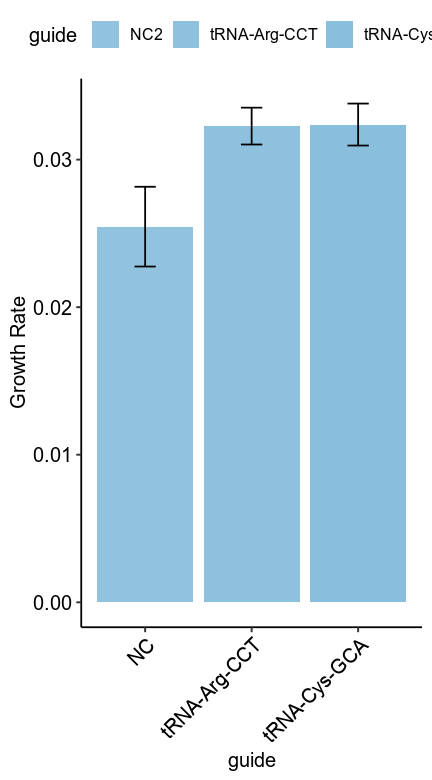

In [9]:
options(repr.plot.width=3.6, repr.plot.height=6.5)
## the error bars are from 95th percentile confidence interval use that to determine significance
slopes_df_select = slopes_df %>% filter(guide %in% c('NC2', 'tRNA-Arg-CCT', 'tRNA-Cys-GCA'))
saveRDS(slopes_df, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/tRF_slopes_df.rds')
saveRDS(slopes_df_select, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/tRF_slopes_df_select.rds')
Stdevs = sqrt(13)*(slopes_df_select$upper_error * 2)/(2*1.96)
means = slopes_df_select$slope
sd_pooled1 = sqrt(12*(Stdevs[1]^2 + Stdevs[2]^2) / 24)
sd_pooled2 = sqrt(12*(Stdevs[1]^2 + Stdevs[3]^2) / 24)
t1 = (means[2] - means[1])/(sd_pooled1 * sqrt(1/13 + 1/13))
t2 = (means[3] - means[1])/(sd_pooled2 * sqrt(1/13 + 1/13))
df = 24
pval1 = pt(t1, df, lower.tail = FALSE)
pval2 = pt(t2, df, lower.tail = FALSE)
ttest_pvals_adjusted = p.adjust(c(pval1, pval2), method = 'bonferroni')
ttest_pvals_adjusted ## values are boneferroni adjusted



ggplot(data = slopes_df_select, aes(x = guide, y = slope, fill = guide)) +
  geom_bar(stat = "identity") + scale_fill_manual(values = colorRampPalette(RColorBrewer::brewer.pal(9, "Blues"))(100)[41:(40 + nrow(slopes_df))]) + geom_errorbar(aes(ymin = slope - lower_error, ymax = slope + upper_error), width=.2) + ylab('Growth Rate') + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_discrete(labels=c("NC", "tRNA-Arg-CCT", "tRNA-Cys-GCA"))
ggsave('/home/ssobti/projects/mir_tud/notebooks/cellcycle/tRF_wetlab_followup/selected_TuDs_proliferation_assay_select.pdf', width = 3.6, height = 6.5)

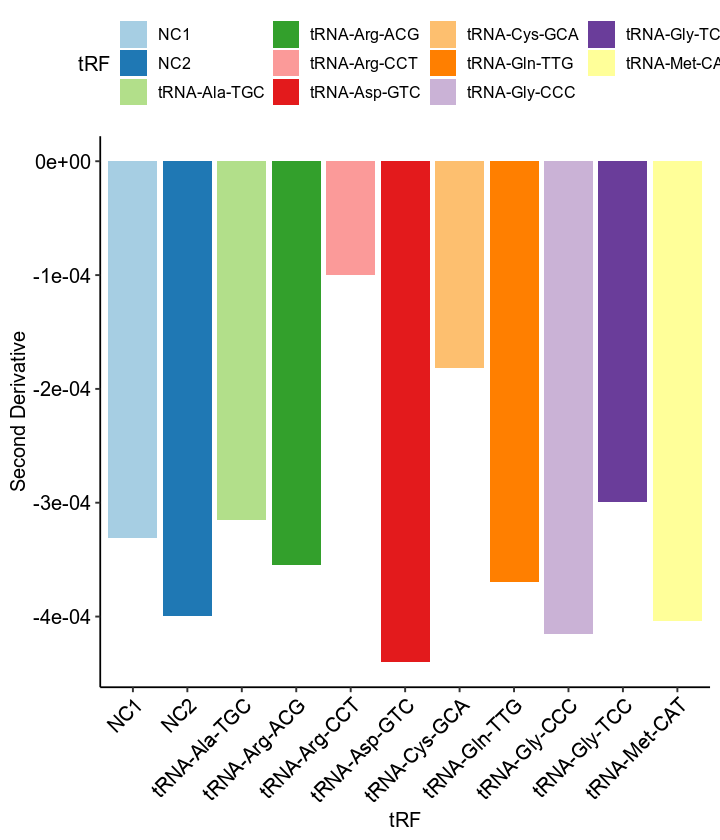

In [7]:
options(repr.plot.width=6, repr.plot.height=7)
## look at second derivative of the data
second_derivatives = data.frame(apply(log2_wider_selected_TuDs_tRFs_proliferation_assay_mean %>% select(-"Elapsed hours"), 2, function(x) mean(diff(diff(x)/6)/6)))
colnames(second_derivatives) = 'Second Derivative'
second_derivatives$tRF = rownames(second_derivatives)
ggplot(data = second_derivatives, aes(x = tRF, y = `Second Derivative`, fill = tRF)) +
  geom_bar(stat = "identity") + scale_fill_brewer(palette = "Paired") + theme_pubr() + theme(axis.text.x = element_text(angle = 45, hjust = 1))